https://towardsdatascience.com/find-and-plot-your-optimal-path-using-plotly-and-networkx-in-python-17e75387b873

In [32]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import folium

In [33]:
# Defining the map boundaries 
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north = 48.0081000, south = 48.0048000,
                        east = 7.8391000, west = 7.8357000, network_type = 'all')                      

C:\Users\Arved\AppData\Local\Temp\ipykernel_51668\364710743.py:3: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(north = 48.0081000, south = 48.0048000,


In [34]:
m = folium.Map(location=[48.006, 7.837], zoom_start=16,
               zoom_control=True, scrollWheelZoom=False)
m.fit_bounds([[48.0048000, 7.8357000], [48.0081000, 7.8391000]])

In [35]:
# read car icon
car_icon = folium.features.CustomIcon('Car Icon.jpeg', icon_size=(30, 30))
# include the car icon in the map
folium.Marker([list(G.nodes(data=True))[0][1]['y'],list(G.nodes(data=True))[0][1]['x']], icon=car_icon).add_to(m)

C:\Users\Arved\AppData\Local\Temp\ipykernel_51668\2080040374.py:3: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', edge_width=2,



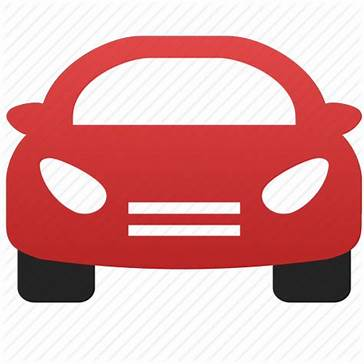

In [38]:
# Plotting the map graph with plotly for being able to select an edge
# The map is interactive and the user can select an edge to get the information about the edge_ID
ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', edge_width=2,
                     edge_color='black', edge_opacity=1, edge_hoverinfo='osmid')
#m

C:\Users\Arved\AppData\Local\Temp\ipykernel_51668\553812771.py:4: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.folium.plot_route_folium(G, route=sp, route_map=m, popup_attribute='osmid', color='red', weight=5)



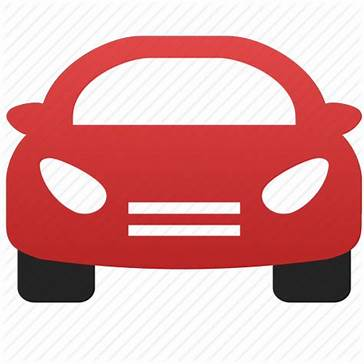

In [37]:
# calculate shortest path
sp = nx.shortest_path(G, list(G.nodes())[0], list(G.nodes())[-1], weight='length')
# plot the shortest path
ox.plot_graph_folium(G, map = m, graph_map = m, popup_attribute='osmid', edge_width=2,
                     edge_color='black', edge_opacity=1, edge_hoverinfo='osmid')
ox.folium.plot_route_folium(G, route=sp, route_map=m, popup_attribute='osmid', color='red', weight=5)